In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn

In [6]:
median_house_hold_in_come_2015 = pd.read_csv("MedianHouseholdincome2015.csv",encoding = "windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv",encoding = "windows-1252")
percent_over_25_completed_high_school = pd.read_csv("PercentOver25CompletedHighSchool.csv",encoding = "windows-1252")
police_killing_us = pd.read_csv("PoliceKillingsUS.csv",encoding = "windows-1252")
share_race_by_city = pd.read_csv("ShareRaceByCity.csv",encoding = "windows-1252")

In [7]:
#Poverty rate of each state
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
percentage_people_below_poverty_level.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


In [9]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [10]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [11]:
percentage_people_below_poverty_level.poverty_rate.replace("-",0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
percentage_people_below_poverty_level.poverty_rate.value_counts()

0.0     1665
7.4      129
6.7      129
10.9     128
10.0     128
        ... 
73.5       1
92.0       1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 770, dtype: int64

In [12]:
percentage_people_below_poverty_level.City.value_counts()

Franklin city          16
Salem city             14
Marion city            14
Madison city           14
Auburn city            13
                       ..
Shepherdsville city     1
Seneca Gardens city     1
Sebree city             1
Science Hill city       1
Y-O Ranch CDP           1
Name: City, Length: 24255, dtype: int64

In [13]:
area_list = percentage_people_below_poverty_level["Geographic Area"].unique()
area_poverty_rate = []

for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i]
    poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_rate.append(poverty_rate)

In [14]:
new_data = pd.DataFrame({"area_list":area_list,"area_poverty_rate":area_poverty_rate})
new_data = new_data.sort_values("area_poverty_rate",ascending = False)
new_data["Index"] = range(len(new_data))
new_data = new_data.set_index("Index")

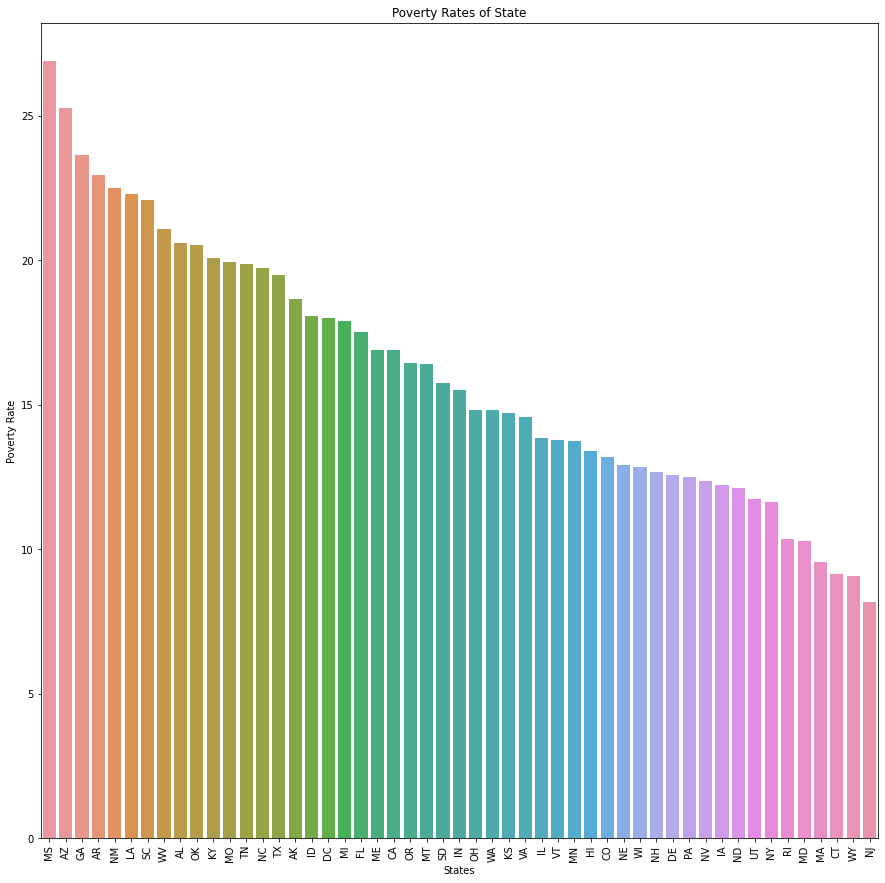

In [15]:
plt.figure(figsize = (15,15))
sns.barplot(x = new_data["area_list"],y = new_data["area_poverty_rate"])
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.ylabel("Poverty Rate")
plt.title("Poverty Rates of State")
plt.show()

In [16]:
police_killing_us = police_killing_us.dropna()

In [17]:
#Most common 15 Name  of killed people
police_killing_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

In [18]:
police_killing_us["name"].value_counts()

Michael Johnson             2
Eric Harris                 2
Daquan Antonio Westbrook    2
Brandon Jones               2
Michael Brown               2
                           ..
Bernard Brandon Powers      1
Kevin Lau                   1
Joe Pasquez Ortiz           1
Anthony Aguilar             1
Dwayne Jeune                1
Name: name, Length: 2249, dtype: int64

In [19]:
police_killing_us.name =  police_killing_us.name[police_killing_us.name != "TK TK"]
police_killing_us.name = police_killing_us.name[police_killing_us.name != "TK Tk"]
names_dictionary = {}
names_unique = police_killing_us.name.unique()
n = []
k = []
for i in names_unique:
    n.append(str(i))
for i in n:
    x = i.split()
    k.append(x[0])
k = set(k)
k = list(k)
names_dict = {}
for i in k:
    names_dict[i] = 0
for i in k:
    for p in police_killing_us.name:
        p = str(p)
        if(i in p):
            names_dict[i]+=1

In [20]:
names = []
numbers = []
for i in names_dict:
    names.append(i)
    numbers.append(names_dict.get(i))

new_data = pd.DataFrame({"names":names,"numbers":numbers})
new_data = new_data.sort_values("numbers",ascending = False)

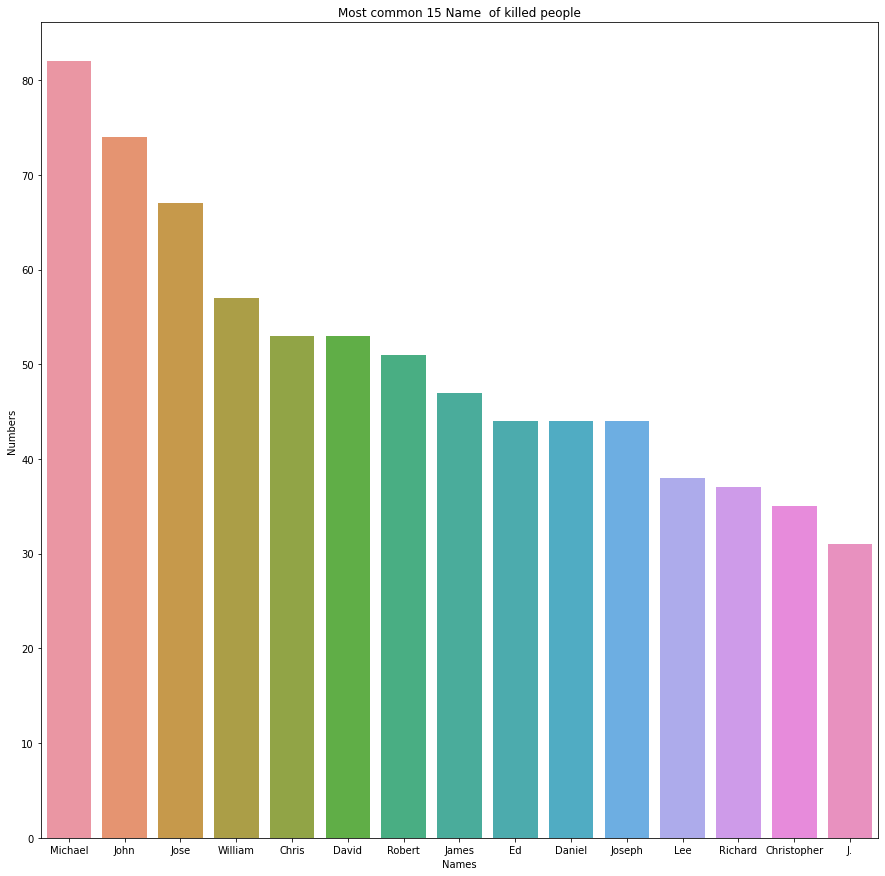

In [21]:
plt.figure(figsize = (15,15))
sns.barplot(x = new_data["names"].head(15),y = new_data["numbers"].head(15))
plt.xlabel("Names")
plt.ylabel("Numbers")
plt.title("Most common 15 Name  of killed people")
plt.show()

In [22]:
#High school graduation rate of the population in states
percent_over_25_completed_high_school = percent_over_25_completed_high_school.dropna()
percent_over_25_completed_high_school

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [23]:
percent_over_25_completed_high_school.percent_completed_hs.replace("-",0,inplace = True)
percent_over_25_completed_high_school.percent_completed_hs = percent_over_25_completed_high_school.percent_completed_hs.astype(float)

In [24]:
percent_over_25_completed_high_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 916.5+ KB


In [25]:
percent_over_25_completed_high_school.describe()

,percent_completed_hs
count,29329.000000
mean,85.157939
std,13.751843
min,0.000000
25%,80.800000
50%,88.300000
75%,93.500000
max,100.000000


In [26]:
unique_states = list(percent_over_25_completed_high_school["Geographic Area"].unique())
numbers = []
for i in unique_states:
    x = percent_over_25_completed_high_school[percent_over_25_completed_high_school["Geographic Area"] == i]
    n = sum(percent_over_25_completed_high_school.percent_completed_hs)/len(x)
    numbers.append(n)

In [27]:
new_data = pd.DataFrame({"states":unique_states,"numbers":numbers})
new_data = new_data.sort_values("numbers",ascending = False)
new_data["Index"] = range(len(new_data))
new_data = new_data.set_index("Index")
new_data

,states,numbers
Index,,
0,DC,2.497597e+06
1,RI,6.937770e+04
2,DE,3.243633e+04
3,NH,2.574842e+04
4,VT,2.064130e+04
5,ME,1.921229e+04
6,NV,1.906563e+04
7,CT,1.734443e+04
8,HI,1.654038e+04


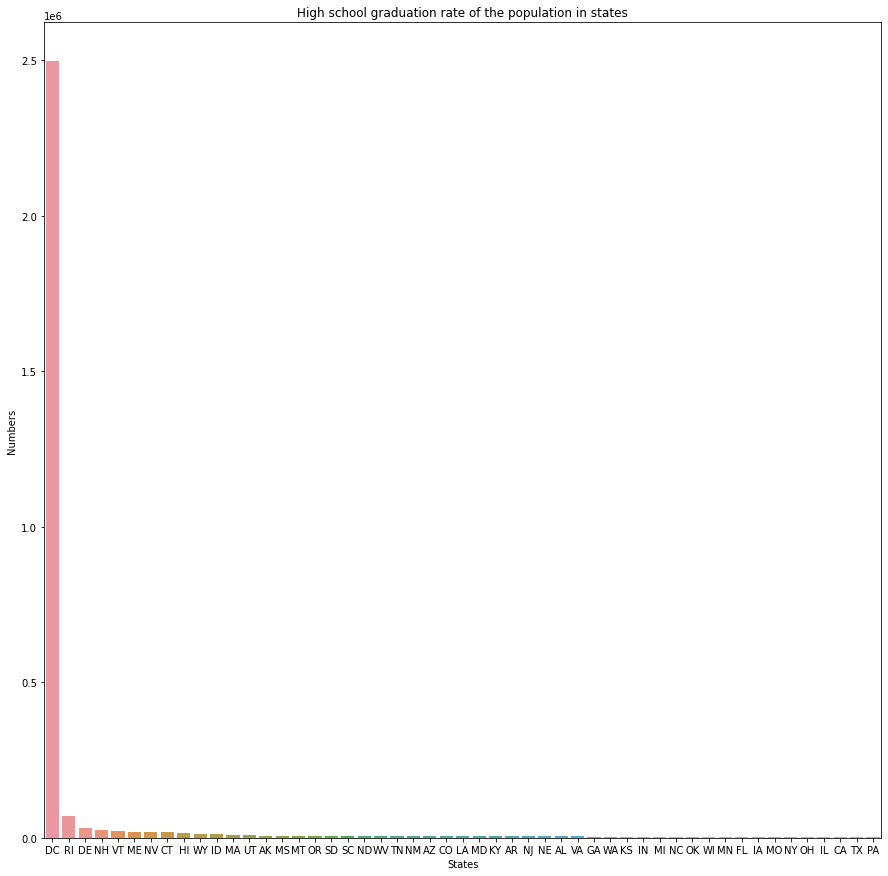

In [28]:
plt.figure(figsize = (15,15))
sns.barplot(x = new_data["states"], y= new_data["numbers"])
plt.xlabel("States")
plt.ylabel("Numbers")
plt.title("High school graduation rate of the population in states")
plt.show()

In [29]:
#Percentage of stat`s population according to races that are black,white,native american,asian and hispanic
share_race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [30]:
share_race_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [31]:
share_race_by_city.describe()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29268,29268,29268,29268,29268,29268,29268
unique,51,24219,997,926,628,409,956
top,PA,Franklin city,100,0,0,0,0
freq,1764,16,1051,6587,6930,8537,2489


In [32]:
columns = share_race_by_city.columns
for i in columns:
    print(share_race_by_city[i].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
['Abanda CDP' 'Abbeville city' 'Adamsville city' ... 'Wright town'
 'Yoder town' 'Y-O Ranch CDP']
['67.2' '54.4' '52.3' '99.1' '13.2' '79.4' '75.9' '62.2' '87.4' '22.6'
 '79.6' '95.8' '70.5' '97.9' '44.7' '96.6' '94.3' '94.1' '78.3' '94.4'
 '79' '71.5' '75.8' '73' '40' '81.5' '75.1' '31.3' '94.7' '66.8' '96.7'
 '96.2' '61.6' '97.5' '69.3' '60.4' '60.3' '97.1' '23.6' '95' '96.1' '8.3'
 '92.3' '81.6' '90.8' '24.3' '86.1' '22.3' '87.3' '94.5' '92.7' '8.8'
 '80.2' '4' '56.1' '82.1' '45.1' '54.1' '84' '6.5' '98.3' '91.1' '73.6'
 '79.5' '92.2' '98.4' '34.1' '59.4' '71.4' '71.2' '53.1' '42' '10.2'
 '89.4' '66.2' '49' '59.2' '72.7' '86.2' '32.6' '87' '72.2' '68.2' '89.5'
 '77.6' '63' '60.1' '87.5' '45.7' '70.7' '74.9' '84.1' '94.9' '35.8'

In [33]:
share_race_by_city.replace(["-"],0.0,inplace = True)
share_race_by_city.replace(["(X)"],0.0,inplace = True)

In [34]:
share_race_by_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]] = share_race_by_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)

In [35]:
share_race_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [36]:
#unique states
states = share_race_by_city["Geographic area"].unique()
states

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [37]:
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

for i in states:
        x = share_race_by_city[share_race_by_city["Geographic area"] == i]
        share_white.append(sum(share_race_by_city["share_white"])/len(x))
        share_black.append(sum(share_race_by_city["share_black"])/len(x))
        share_native_american.append(sum(share_race_by_city["share_native_american"])/len(x))
        share_asian.append(sum(share_race_by_city["share_asian"])/len(x))
        share_hispanic.append(sum(share_race_by_city["share_hispanic"])/len(x))

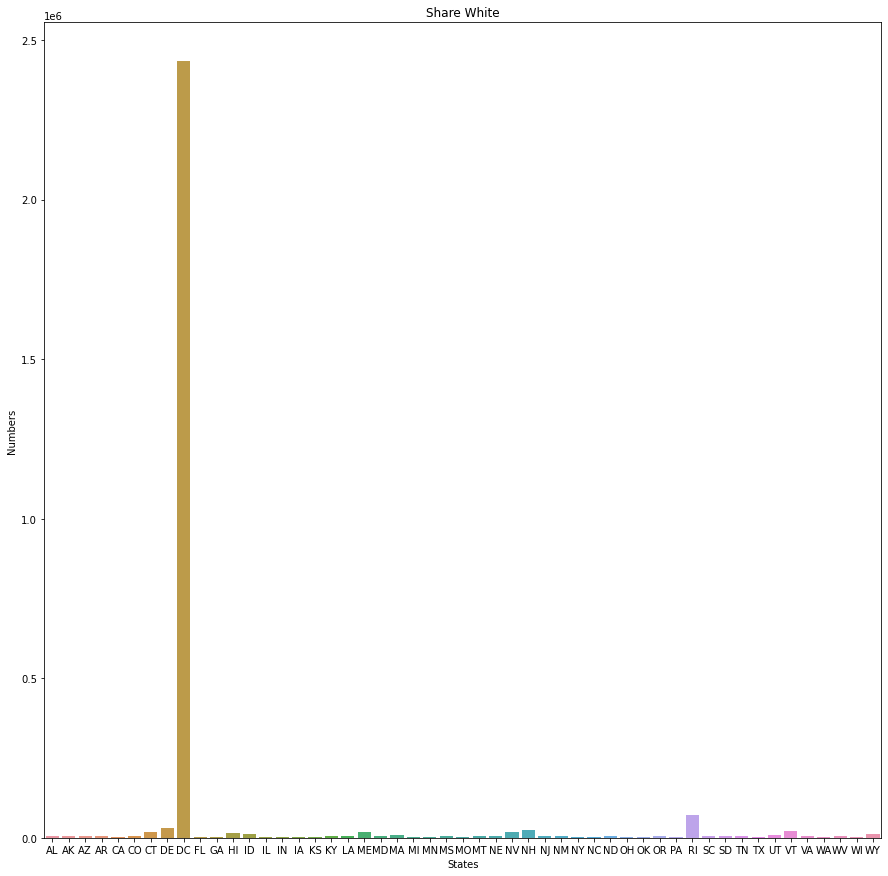

In [148]:
#Share white
plt.figure(figsize = (15,15))
sns.barplot(x = states,y = share_white)
plt.xlabel("States")
plt.title("Share White")
plt.ylabel("Numbers")
plt.show()

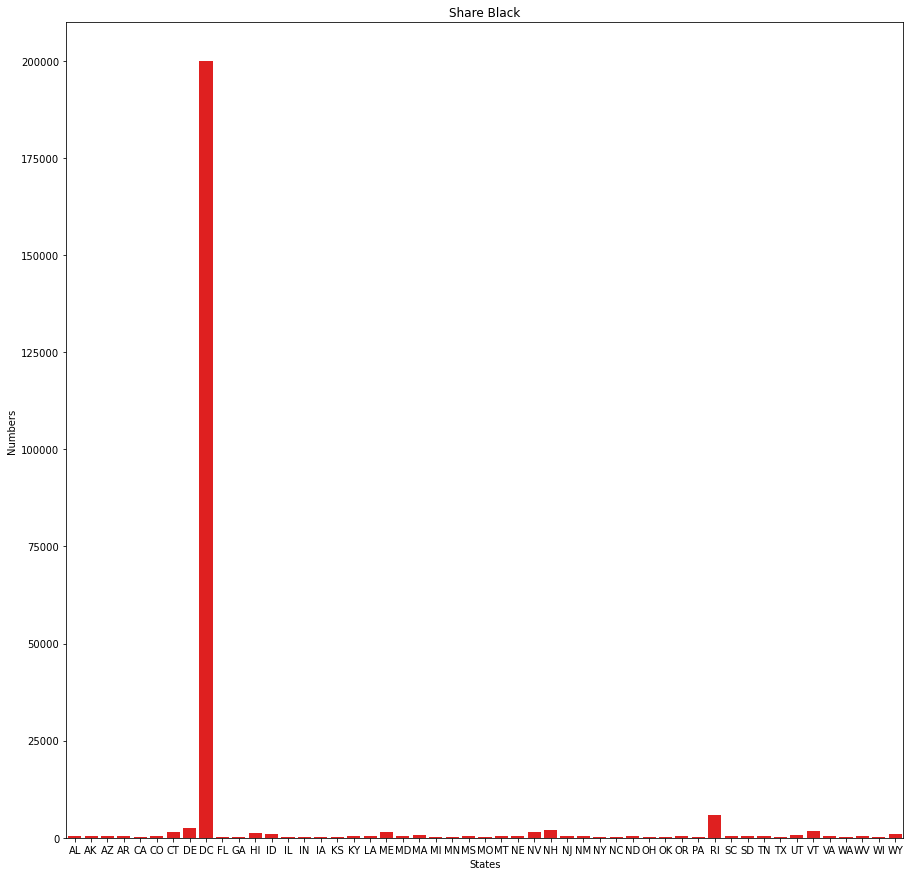

In [39]:
#Share Black
plt.figure(figsize = (15,15))
sns.barplot(x= states,y = share_black,color = "red")
plt.xlabel("States")
plt.ylabel("Numbers")
plt.title("Share Black")
plt.show()

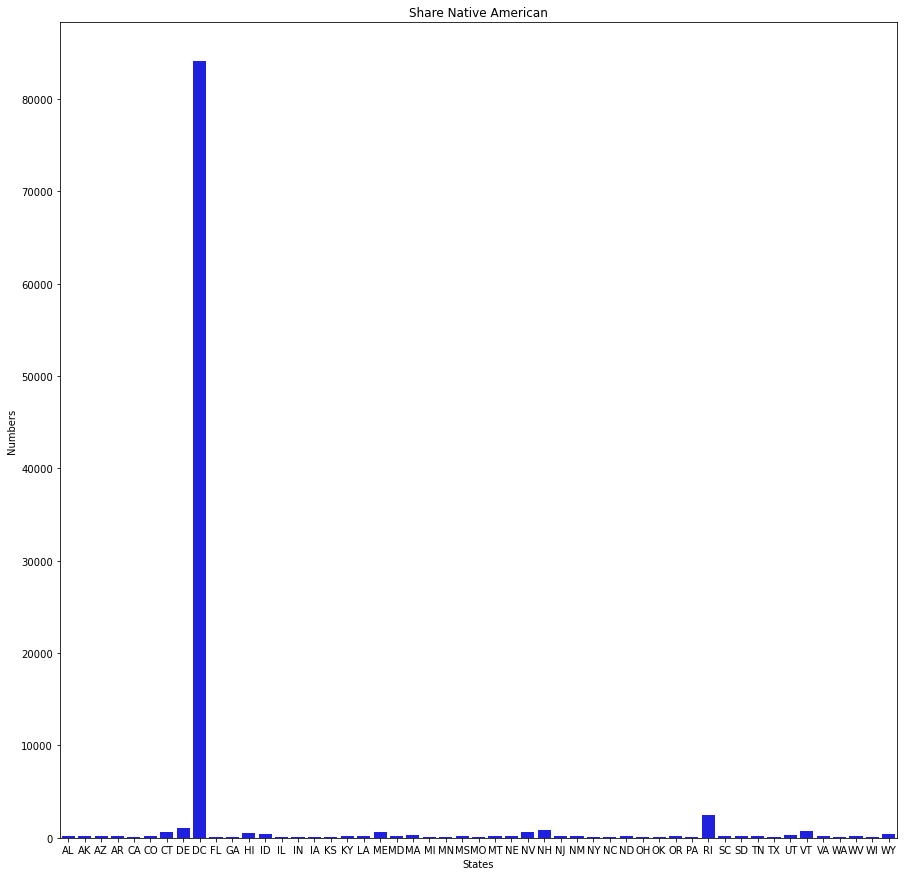

In [40]:
# Share Native American
plt.figure(figsize = (15,15))
sns.barplot(x = states,y = share_native_american,color = "blue")
plt.xlabel("States")
plt.ylabel("Numbers")
plt.title("Share Native American")
plt.show()

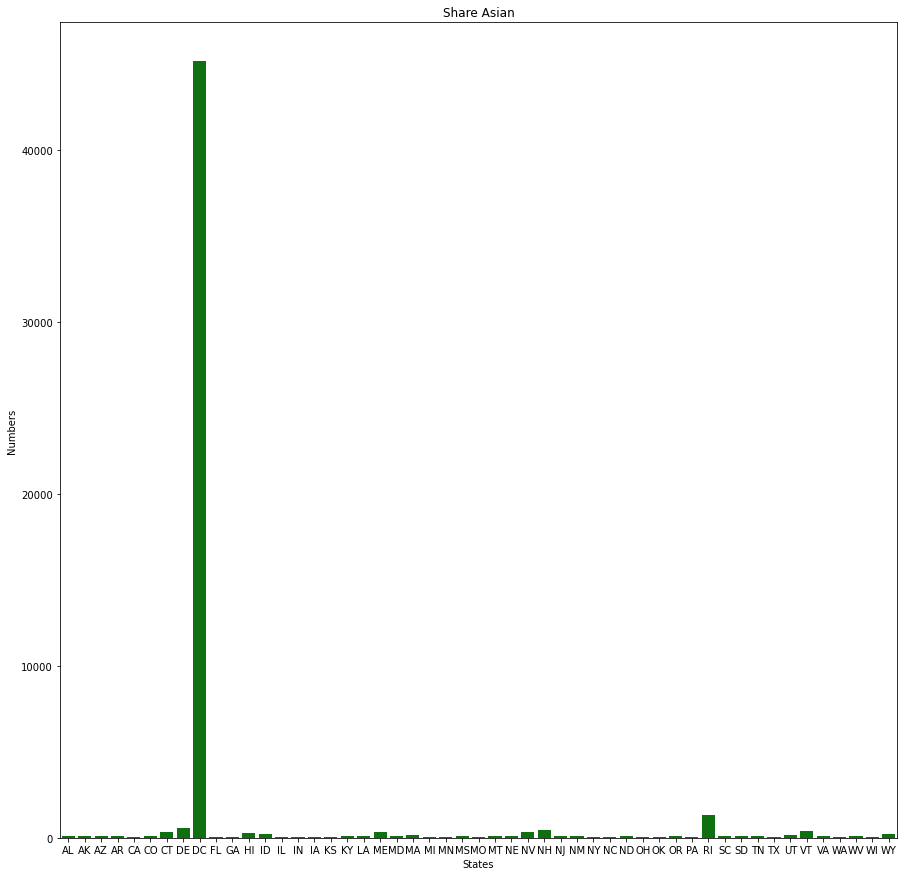

In [41]:
#Share Asian
plt.figure(figsize = (15,15))
sns.barplot(x = states,y = share_asian,color = "green")
plt.xlabel("States")
plt.ylabel("Numbers")
plt.title("Share Asian")
plt.show()

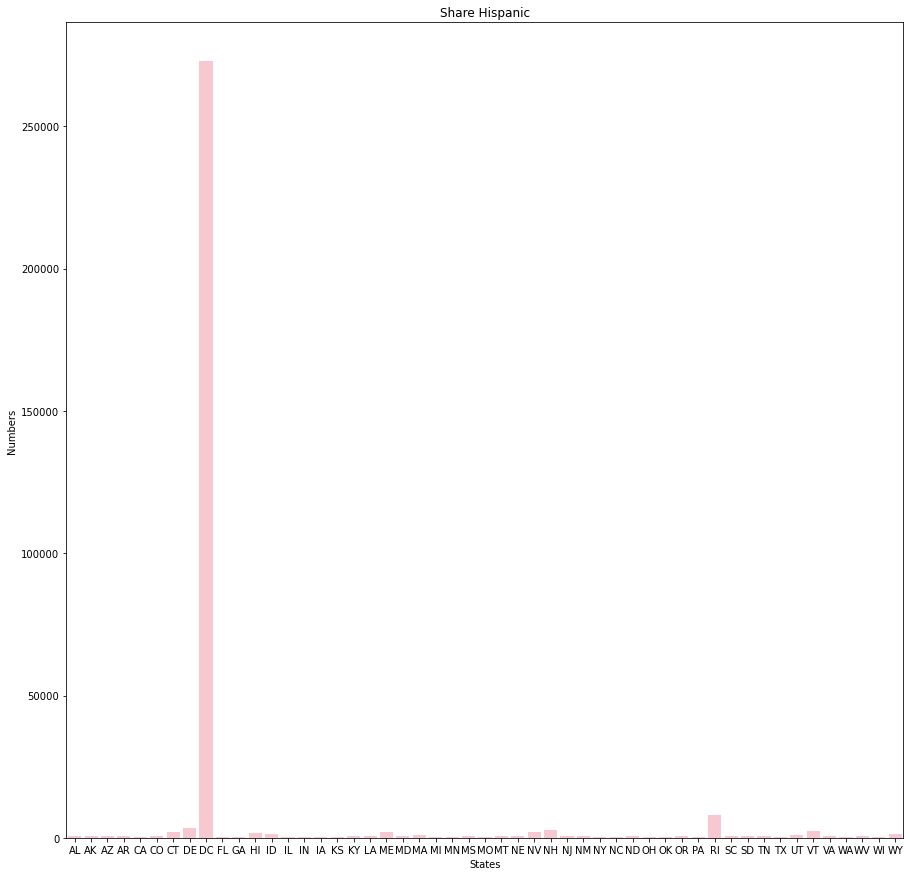

In [43]:
#Share Hispanic
plt.figure(figsize = (15,15))
sns.barplot(x = states, y = share_hispanic,color = "pink")
plt.xlabel("States")
plt.ylabel("Numbers")
plt.title("Share Hispanic")
plt.show()